
# Insurance Purchases Prediction Using Logistic Regression (Binary Classification)

# 1. Description
## 1.1 Definition
A statistical model for binary classification is called **logistic regression.** Using the **sigmoid function,** it forecasts the likelihood that an instance will belong to a particular class, guaranteeing results between **0 and 1.**

To minimize the **log loss,** the model computes a *linear combination of input characteristics, transforms it* using the **sigmoid,** and then optimizes its coefficients using methods like **gradient descent.**These coefficients establish the decision boundary that divides the classes.

Because of its ease of use, interpretability (*easy of being understood*), and versatility across multiple domains, **Logistic Regression** is widely used in machine learning for problems that involve binary outcomes.

**Overfitting** can be avoided by implementing **regularization.**

## 1.2 Dataset Description
* Dataset contains two columns; one named as **'age'** and another as **'bought_insurance'**.<br>
* All feature values are numeric (integer).
* In column **bought_insurance**
  * **1** means person buying the insurance.
  * **0** means person not buying the insurance.

## 1.3 Purposes / Objective
Predict; whether a person would buy a life insurnace based on her/his age or not, using the **logistic regression binary classification.**

## 2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 3. Load dataset

In [2]:
url = "https://raw.githubusercontent.com/akdubey2k/ML/main/ML_7_Logistic_Regression(Binary_Classification)/ML_7_insurance_data.csv"
df = pd.read_csv(url)
df.head(5)

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


# 4. Dataset EDA (Exploratory Data Analysis)
* Distribute the dataset into **independent** and **dependent** features.
* **Independent features :** Column number **0th (age)**, representing the age of person
* **Dependent features :** Column numer **1st (bought_insurance)**.


## 4.1 Dataset distribution into **independent** and **dependent** features

In [3]:
X = df[['age']]
y = df['bought_insurance']

## 4.2 Check for the count of 'nan' data point in the dataset

In [4]:
# check, if there is any null value in the dataset
df.isnull().sum().any()

False

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


## 4.3 Data point distribution visualization on **Scatter Plot**, before model training.

Text(0, 0.5, 'bought_insurance')

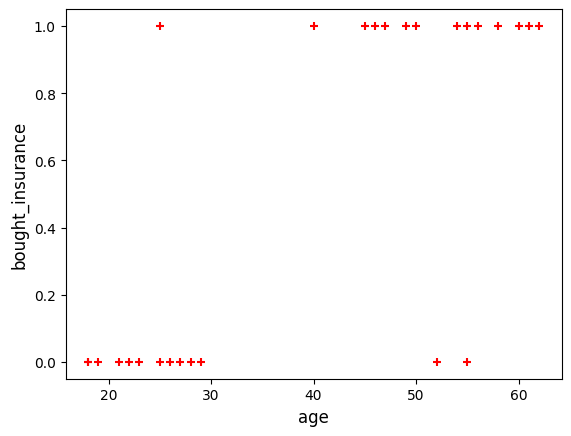

In [6]:
plt.scatter(X, y, color='red', marker='+')
plt.xlabel('age', fontsize='12')
plt.ylabel('bought_insurance', fontsize='12')

# 5. Dataset distribution
## 5.1 Distributing dataset into **training** and **test (validation)** set using *sci-kit learn's "train_test_split"*

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

# 6. Dataset model training and inference
## 6.1 Training the "Logistic Regression" model on 'training dataset'

In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
len(X_train)

21

In [10]:
len(X_test)

6

In [11]:
X_test

,age
21,26
8,62
4,46
22,40
3,52
19,18


## 6.2 Predicting the result of 'test dataset' using "logistic regression" model

In [12]:
y_pred = model.predict(X_test)
y_pred
# 0 means will not buy insurance
# 1 means will buy insurance

array([0, 1, 1, 1, 1, 0])

# 7. Evaluation of the "Logistic Regression" model

In [13]:
model.score(X_test, y_test)

0.8333333333333334

In [14]:
X_test

,age
21,26
8,62
4,46
22,40
3,52
19,18


## 8. Data Validation

#### As per above **"test (validation)"** set of data, below is the person will buy or will not buy probability matrix

In [15]:
# down array explanation as it is [not buy probability, buy probability]
y_pred = model.predict_proba(X_test)
print("[not buy probability, buy probability]")
y_pred

[not buy probability, buy probability]


array([[0.85296045, 0.14703955],
       [0.02800927, 0.97199073],
       [0.2334178 , 0.7665822 ],
       [0.42434178, 0.57565822],
       [0.11172419, 0.88827581],
       [0.94963882, 0.05036118]])

In [16]:
coef = model.coef_
coef

array([[0.14735618]])

In [17]:
inter = model.intercept_
inter

array([-5.58927221])

In [18]:
len(y_test)

6

In [19]:
len(y_pred)

6

## 9. Data Visualization

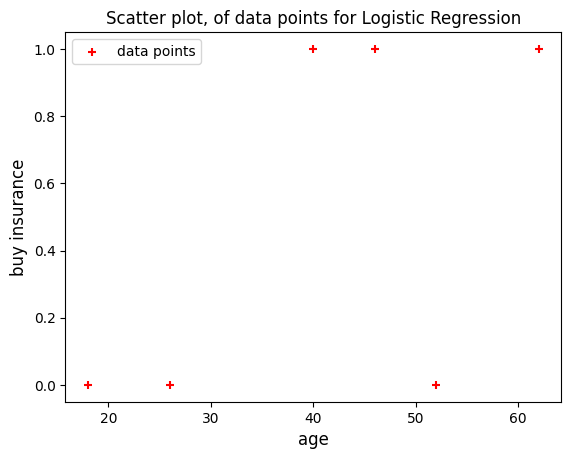

In [46]:
plt.scatter(X_test, y_test, color='red', marker='+', label='data points')
plt.xlabel('age', fontsize='12')
plt.ylabel('buy insurance', fontsize='12')
plt.title('Scatter plot, of data points for Logistic Regression')
plt.legend()
plt.show()

In [21]:
import math

## 10. Prediction
## Lets defined sigmoid function now and do the math with hand

## Sigmoid function implementation for logistic regression and neural networks.
* **np.exp(-y):** Computes the exponential of -y. The numpy exp function can handle scalars, vectors, and matrices, making this implementation more versatile.
* **1 + np.exp(-y):** Adds 1 to the result of the exponential calculation.
* **1/(1 + np.exp(-y)):** Takes the reciprocal of the result, completing the sigmoid function calculation.

###

* Purpose: The sigmoid function computes the sigmoid of the input y.
* Versatility: Using numpy's exp function allows the function to handle scalars, vectors, and matrices.
* Application: The sigmoid function is often used in logistic regression, neural networks, and other models that output probabilities.

In [22]:
def sigmoid(y):
  # Z = 1/(1 + math.exp(-y))
  Z = 1/(1 + np.exp(-y))
  return Z

In [23]:
def prediction(age):
  y = coef * age + inter
  y = np.array(y)
  y_pred = sigmoid(y)
  return y_pred

In [24]:
age = 56
if prediction(age) > 0.5:
  print('Person will buy insurance')
else:
  print('Person will not buy insurance')

Person will buy insurance


In [25]:
# x = np.arrange(df.age.min, df.age.max, 0.2)

In [26]:
age = 26
if prediction(age) > 0.5:
  print('Person will buy insurance')
else:
  print('Person will not buy insurance')

Person will not buy insurance


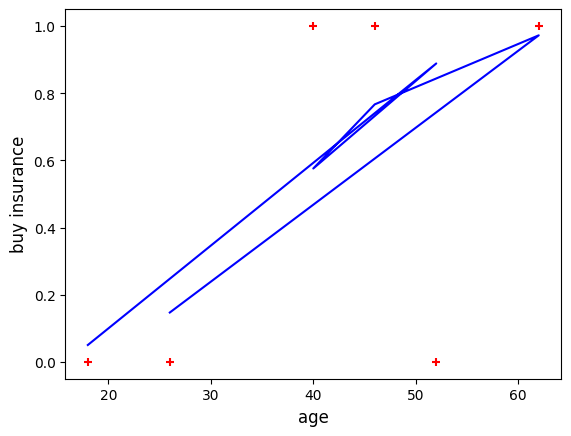

In [32]:
# Plotting the logistic regression curve
x_values = np.linspace(0, 65, 100)
y_values = logistic_function(x_values)

plt.scatter(X, y, color='red', label='Data points')
plt.plot(x_values, y_values, label='Logistic Regression Curve')


# ------------------

x_values = np.linspace(0, 12, 100)
print("x_values : \n", x_values)
y_values = prediction(x_values)
print("y_values : \n", y_values)

plt.scatter(X_test, y_test, color='red', marker='+')
plt.xlabel('age', fontsize='12')
plt.ylabel('buy insurance', fontsize='12')
# plt.plot(X_test, prediction(X_test), color='blue')
plt.plot(x_values, y_values, label='Logistic Regression Curve')
plt.legend()
plt.show()

Model parameters: beta_0 = -4.689894191757488, beta_1 = 0.9414319386924433
Hours Studied: 3, Probability of Passing: 0.134, Predicted Outcome: Fail
Hours Studied: 7, Probability of Passing: 0.870, Predicted Outcome: Pass
Hours Studied: 10, Probability of Passing: 0.991, Predicted Outcome: Pass
x_values : 
 [ 0.          0.12121212  0.24242424  0.36363636  0.48484848  0.60606061
  0.72727273  0.84848485  0.96969697  1.09090909  1.21212121  1.33333333
  1.45454545  1.57575758  1.6969697   1.81818182  1.93939394  2.06060606
  2.18181818  2.3030303   2.42424242  2.54545455  2.66666667  2.78787879
  2.90909091  3.03030303  3.15151515  3.27272727  3.39393939  3.51515152
  3.63636364  3.75757576  3.87878788  4.          4.12121212  4.24242424
  4.36363636  4.48484848  4.60606061  4.72727273  4.84848485  4.96969697
  5.09090909  5.21212121  5.33333333  5.45454545  5.57575758  5.6969697
  5.81818182  5.93939394  6.06060606  6.18181818  6.3030303   6.42424242
  6.54545455  6.66666667  6.78787879

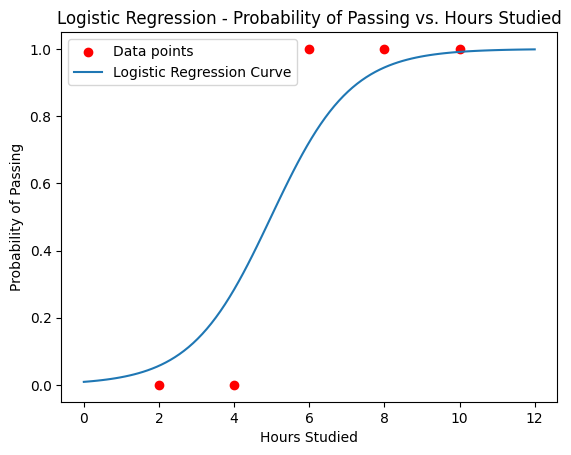

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Sample dataset
# Hours Studied and whether the student passed (1 = yes, 0 = no)
X = np.array([2, 4, 6, 8, 10]).reshape(-1, 1)  # Features (Hours Studied)
y = np.array([0, 0, 1, 1, 1])  # Target variable (Passed or Not)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Parameters of the model (intercept and coefficient)
beta_0 = model.intercept_[0]
beta_1 = model.coef_[0][0]
print(f"Model parameters: beta_0 = {beta_0}, beta_1 = {beta_1}")

# Function to calculate logistic function
def logistic_function(x):
    return 1 / (1 + np.exp(-(beta_0 + beta_1 * x)))

# Make predictions
hours_studied = np.array([3, 7, 10])
probabilities = logistic_function(hours_studied)
predictions = model.predict(hours_studied.reshape(-1, 1))

for hours, prob, pred in zip(hours_studied, probabilities, predictions):
    print(f"Hours Studied: {hours}, Probability of Passing: {prob:.3f}, Predicted Outcome: {'Pass' if pred == 1 else 'Fail'}")

# Plotting the logistic regression curve
x_values = np.linspace(0, 12, 100)
print("x_values : \n", x_values)
y_values = logistic_function(x_values)
print("y_values : \n", y_values)

plt.scatter(X, y, color='red', label='Data points')
plt.plot(x_values, y_values, label='Logistic Regression Curve')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression - Probability of Passing vs. Hours Studied')
plt.legend()
plt.show()